# CHURN CLASSIFICATION 

I want to figure out what would be the best estimator to set for the pipeline.  


There are 22 features and the label class is the Attrition_Flag.

In [1]:
# importing required library 
import pandas as pd 

In [2]:
# reading in the csv file 
df = pd.read_csv('BankChurners.csv')

In [3]:
# viewing the head of the dataset
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## DATA PREPARATION 

In [5]:
# removing the clientnum since it refers to an ID
df.drop(columns = ['CLIENTNUM'], inplace = True)

# removing the navie_bayes_classifier_attrition..
df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
       inplace = True)

# seeing how many duplicates there are
print('How many duplicate values are there: ', len(df) - len(df.drop_duplicates()))

How many duplicate values are there:  0


In [6]:
# checking to see if there are any null values in the data
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### OUTLIER ANALYSIS 

<br /> 

#### Customer_Age

In [8]:
# checking to see the min age
df['Customer_Age'].min()

26

In [9]:
# checking to see the max age 
df['Customer_Age'].max()

73

#### Gender

In [10]:
# checking to see the unique values in the gender feature
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [11]:
# convert M and F to 0 and 1 
df['Gender'].replace({'M':0, 'F':1}, inplace = True)

# seeing if the values in the gender feature are 0 and 1 now
df['Gender'].unique()

array([0, 1])

<br /> 

#### Dependent_count

In [12]:
# checking to make sure there are no null values 
df['Dependent_count'].unique()

array([3, 5, 4, 2, 0, 1])

<br /> 

#### Education_Level

In [13]:
# checking to see all of the different education levels in the dataset
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [14]:
# replace Unknown with Education_Level_Unknown
df['Education_Level'].replace({'Unknown': 'Education_Level_Unknown'}, inplace = True)

# making sure the change happened 
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Education_Level_Unknown',
       'College', 'Post-Graduate', 'Doctorate'], dtype=object)

<br />

#### Marital_Status

In [15]:
# seeing the different values in this feature
df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [16]:
# replace Unknown with Marital_Status_Unknow
df['Marital_Status'].replace({'Unknown': 'Marital_Status_Unknown'}, inplace = True)

# making sure the change occurred 
df['Marital_Status'].unique()

array(['Married', 'Single', 'Marital_Status_Unknown', 'Divorced'],
      dtype=object)

<br /> 

#### Income_Category

In [17]:
# seeing the different values for this feature 
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [18]:
# convert Unknown to Income_Category_Unknown
df['Income_Category'].replace({'Unknown' : 'Income_Category_Unknown'}, inplace = True)

# checking to make sure the replacement occurred 
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Income_Category_Unknown'], dtype=object)

<br /> 

#### Card_Category

In [19]:
# seeing the unique values for the card_category
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [20]:
# replace Blue with Blue_Card_category, Gold with Gold_Card_Category, Silver with Silver_Card_category and Platinum
# with Platinum_Card_Category
df['Card_Category'].replace({'Blue': 'Blue_Card_Category', 'Gold': 'Gold_Card_Category', 
                            'Silver': 'Silver_Card_category', 'Platinum': 'Platinum_Card_Category'},inplace = True)

# make sure the values were replaced
df['Card_Category'].unique()

array(['Blue_Card_Category', 'Gold_Card_Category', 'Silver_Card_category',
       'Platinum_Card_Category'], dtype=object)

<br /> 

#### Months_on_book

In [21]:
# checking to make sure there are no negative numbers
df['Months_on_book'].min()

13

<br /> 

#### Total_Relationship_Count

In [22]:
# making sure the number isn't negative
df['Total_Relationship_Count'].min()

1

<br /> 

#### Months_Inactive_12_mon

In [23]:
# checking to make sure there aren't any negatives
df['Months_Inactive_12_mon'].min()

0

#### Contacts_Count_12_mon

In [24]:
# checking to make sure there aren't any negatives
df['Contacts_Count_12_mon'].min()

0

#### Credit_Limit

In [25]:
# making sure there aren't any negative or 0 
df['Credit_Limit'].min()

1438.3

#### Total_Revolving_Bal

In [26]:
# making sure there aren't any negative values 
df['Total_Revolving_Bal'].min()

0

<br /> 

#### Avg_Open_To_Buy

In [27]:
# making sure there aren't any negative values 
df['Avg_Open_To_Buy'].min()

3.0

<br /> 

#### Total_Amt_Chng_Q4_Q1

In [28]:
# making sure there aren't any negative values
df['Total_Amt_Chng_Q4_Q1'].min()

0.0

<br /> 

#### Total_Trans_Amt

In [29]:
# checking to make sure there aren't any negative values
df['Total_Trans_Amt'].min()

510

<br /> 

#### Total_Trans_Ct

In [30]:
# checking to make sure there aren't any negative values
df['Total_Trans_Ct'].min()

10

<br />

#### Total_Ct_Chng_Q4_Q1

In [31]:
# checking to make sure there aren't any negative values
df['Total_Ct_Chng_Q4_Q1'].min()

0.0

<br /> 

#### Avg_Utilization_Ratio

In [32]:
# checking to make sure there aren't any negative values
df['Avg_Utilization_Ratio'].min()

0.0

<br /> 

## DATA VISUALIZATION 

In [33]:
# importing required libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [34]:
# setting the style 
sns.set_style('ticks')

# creating the palette for the charts 
palette = ['#456268', '#79A3B1'] 

In [35]:
# function that will create the plot for me 
def create_plot(df, x, y = '', figsize = (15,10), hue = 'Attrition_Flag'):
    # setting the figure size 
    plt.figure(figsize = figsize)
    
    # creating the plot
    # this is for when I'm plotting the label 
    if hue == x: 
        sns.countplot(data = df, x = x, palette = ['#456268'])
        title = 'How Many People Churned'
    else:
        # this if when I'm plotting the other features to see how they affect the label
        sns.countplot(data = df, x = x, hue = hue, palette = palette)
        title = "Based On The " + x + " Feature How Many People Churned/Didn't Churn"
    
    # creating the plot title 
    plt.title(
        title, 
        size = 20, # the size of the title
        fontweight = 'bold', # making the title bold
        y = 1.02 # move the title up alitle
    )
    
    # creating the x label 
    plt.xlabel(
        x,
        size = 12, # size of the label
        labelpad = 20 # moving the label down
    )
    
    # creating the y label
    plt.ylabel(
        y
    )
    
    
    # show the plot 
    plt.show()

<br /> 

### PLOTS 

In [36]:
# seeing all the column names
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [37]:
# create a copy of the dataframe to use for the visualizations and adjust the values in the columns to make the 
# charts more understandable 

df_vis = df.copy()

<br />

#### Attrition_Flag

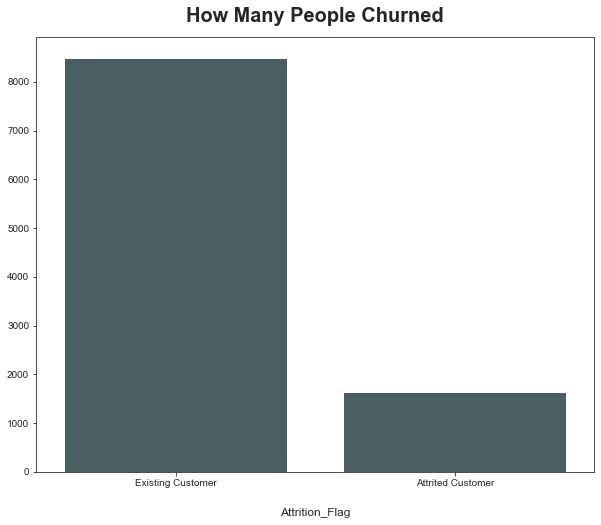

In [38]:
x = 'Attrition_Flag'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

You can see that most of the People in this dataset are still with the bank. This is an imbalanced dataset

<br /> 

#### Customer_Age

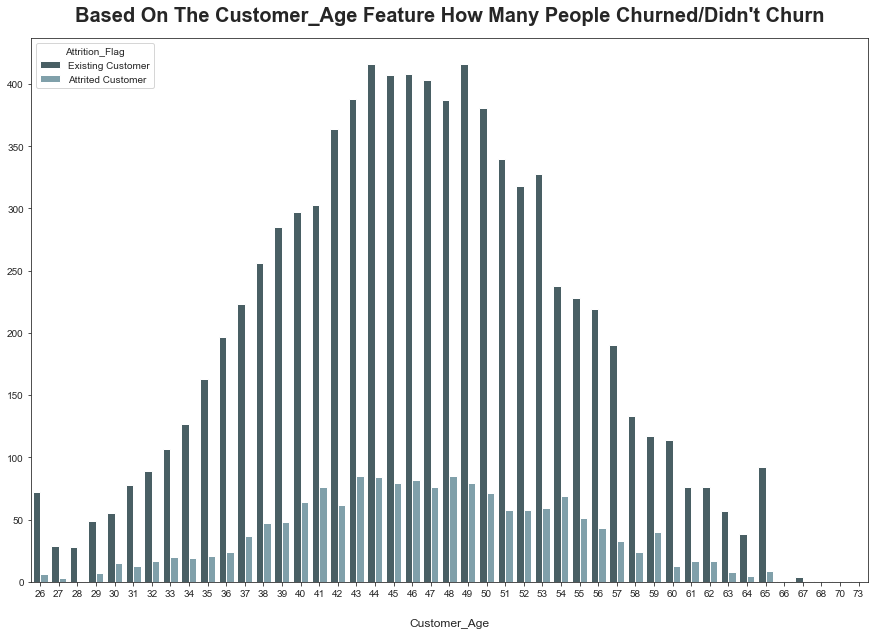

In [39]:
x = 'Customer_Age'
title = 'Based On The Customer Ages How Many People Churned'

create_plot(df_vis, x)

This chart shows that most of the individuals that churned were around 37 till 59. Also you can see that the number of customers who are still with the bank based on their age creates a sort of bell curve. 

<br /> 

#### Gender

In [40]:
# replace 0 and 1 with Male and Female so its easier to understand the chart 
df_vis['Gender'].replace({0:'Male', 1: 'Female'}, inplace = True)

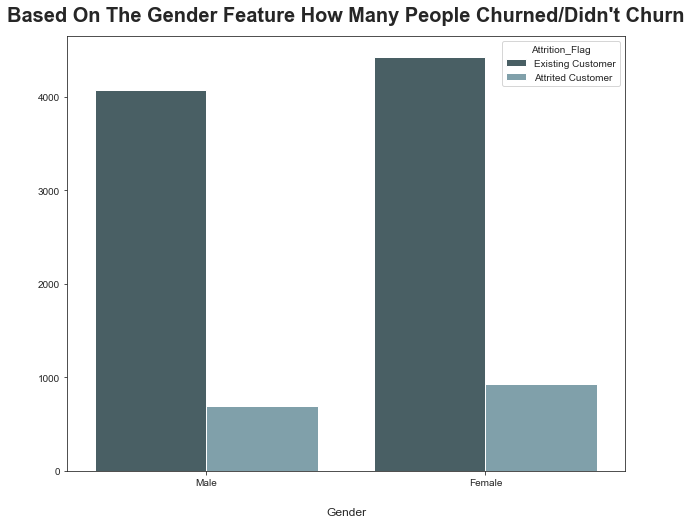

In [41]:
x = 'Gender'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

This dataset contains more Females than Males

<br /> 

#### Dependent_count

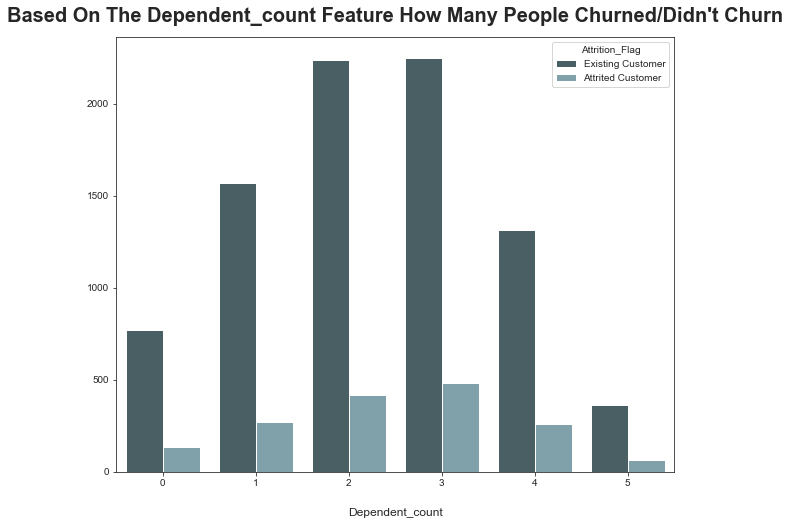

In [42]:
x = 'Dependent_count'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Seems like the the dependent count of 2 and 3 had the same number of people who didn't churn. Also it seems that the more dependent count you have you also get a higher chance of churning but once you hit 3 it decreases. 

<br /> 

#### Education_Level

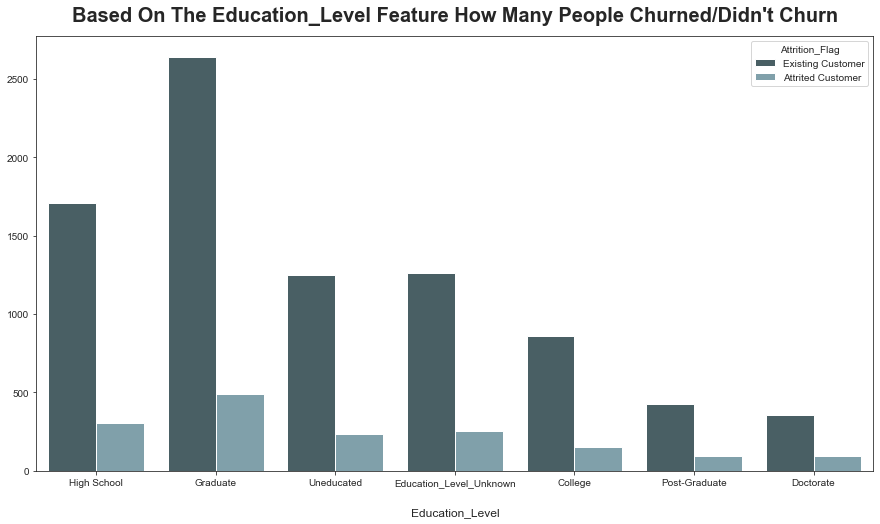

In [43]:
x = 'Education_Level'
figsize = (15,8)

create_plot(df_vis, x, figsize = figsize)

Seems like most of people in this dataset have a graduate degree

<br /> 

#### Marital_Status

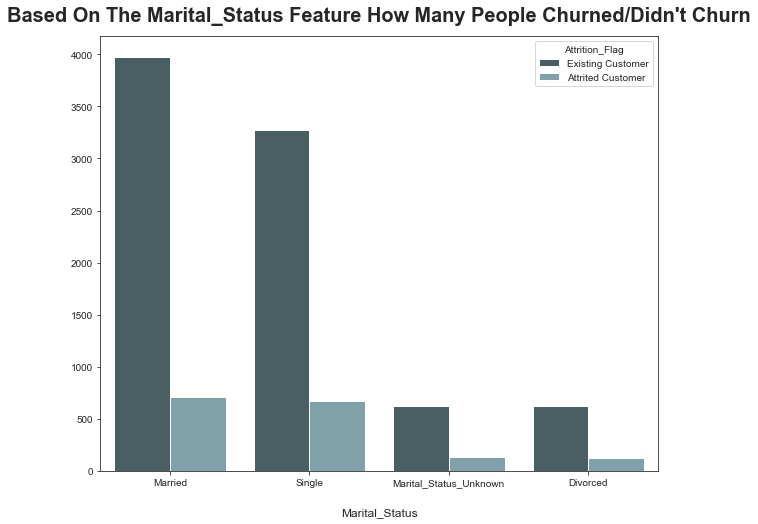

In [44]:
x = 'Marital_Status'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the people in this dataset seem to be either married or single. Also the number of people who churned who are single or married are very close to one another. 


<br /> 

#### Income_Category

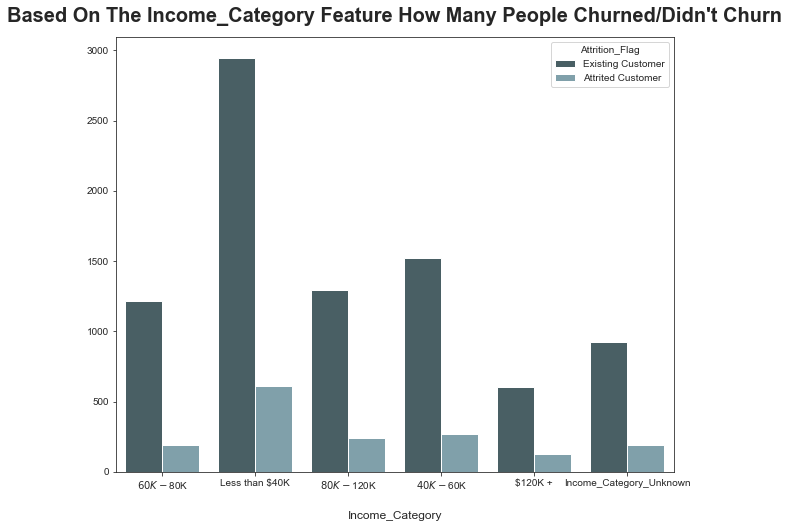

In [45]:
x = 'Income_Category'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

IT seems that most of the people in this dataset have an income of less than $40K

<br /> 

#### Card_Category

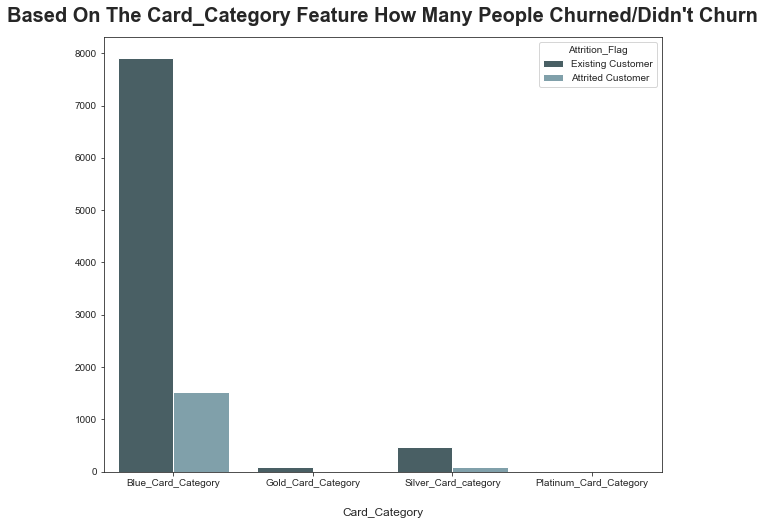

In [46]:
x = 'Card_Category'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Almost all of the people in this dataset have a blue card

<br /> 

#### Months_on_book

In [47]:
# seeing how many different values there are for this feature
len(df_vis['Months_on_book'].unique())

44

In [48]:
# viewing the min value
df_vis['Months_on_book'].min()

13

In [49]:
# viewing the max value
df_vis['Months_on_book'].max()

56

In [50]:
# binning this feature so the chart is easy to read. The bins I am going to create are 
# [1-12] = (0,12]      -> label = 1 year
# [13-24] = (12,24]    -> label = 2 year
# [25-36] = (25,36]    -> label = 3 year
# [37-48] = (37,48]    -> label = 4 year
# [49-60] = (48,60]    -> label = 5 year

# defining the bins
months_bins = [0,12,24,36,48,60]

# creating the labels 
labels = ['1 year', '2 years', '3 years', '4 years', '5 years']

df_vis['Months_on_book'] = pd.cut(x = df_vis['Months_on_book'], bins = months_bins, labels = labels)

# viewing the unique values of Months_on_book to see if the binning worked 
df_vis['Months_on_book'].unique()

[4 years, 3 years, 2 years, 5 years]
Categories (4, object): [2 years < 3 years < 4 years < 5 years]

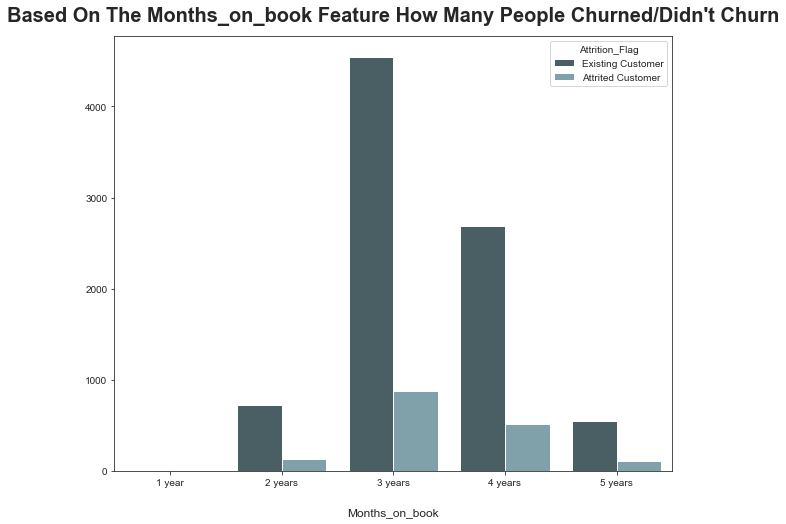

In [51]:
# plotting 
x = 'Months_on_book'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

As we can see that Most of the people fall in the 3 or 4 years range. Which means the months on book is 25-36 months for the people in the 3 year and 37-48 for the people in 4 years.

<br /> 

#### Total_Relationship_Count

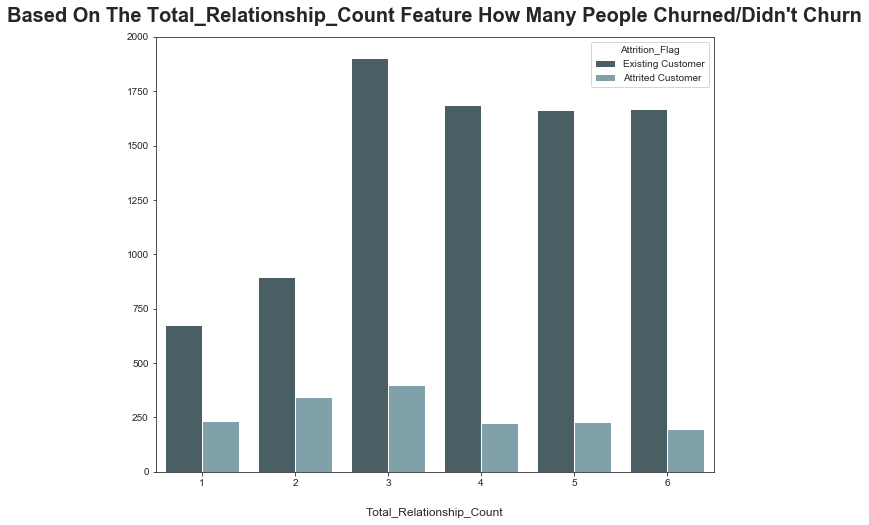

In [52]:
x = 'Total_Relationship_Count'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the people in this dataset have a total relationship of 3. But the number of people with a total relationship of 4, 5, and 6 are very close to 3.  

<br /> 

#### Months_Inactive_12_mon

In [53]:
# seeing how many unique values there are that I will need to plot
len(df_vis['Months_Inactive_12_mon'].unique())

7

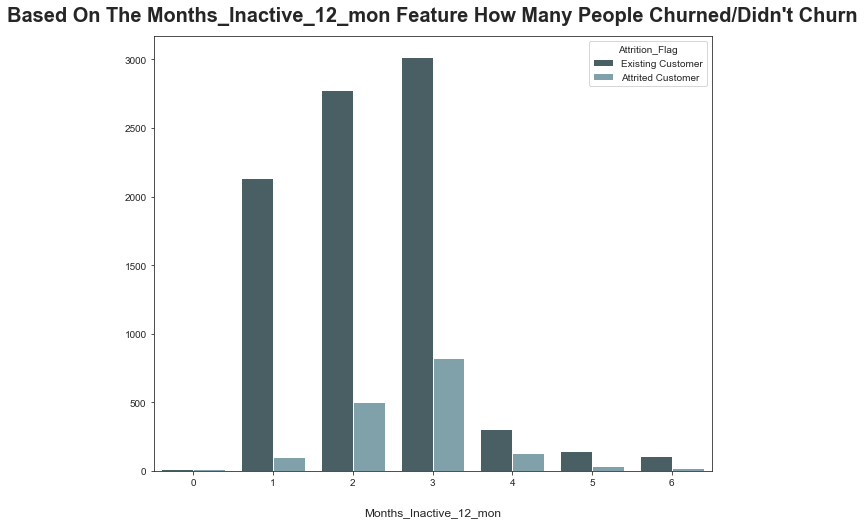

In [54]:
x = 'Months_Inactive_12_mon'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the people in this dataset were either inactive for 1,2 or 3 months. 

<br /> 

#### Contacts_Count_12_mon

In [55]:
# seeing how many different values are in this feature
len(df_vis['Contacts_Count_12_mon'].unique())

7

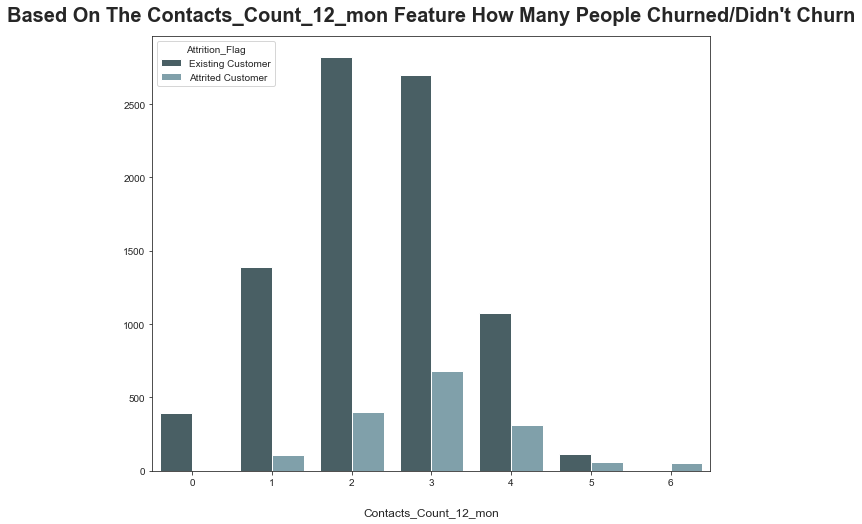

In [56]:
x = 'Contacts_Count_12_mon'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the values fall either in 2 or 3

<br /> 

#### Credit_Limit

In [57]:
# seeing how many different values are in credit limit
len(df_vis['Credit_Limit'].unique())

6205

In [58]:
# viewing the min value
df_vis['Credit_Limit'].min()

1438.3

In [59]:
# viewing the max value
df_vis['Credit_Limit'].max()

34516.0

In [60]:
# create bins
# min - 1,438.3.     max - 34,516.0
# plot the values: (1,000,5,000], (5,000 - 10,000], (10,000 - 15,000], (15,000 - 20,000], (20,000 - 25,000], 
# (25,000 - 30,000], (30,000 - 35,000]

# define the bins to create
credit_bins = [1000,5000,10000,15000,20000,25000,30000,35000]

# replace the values with the bins 
df_vis['Credit_Limit'] = pd.cut(df_vis['Credit_Limit'], bins = credit_bins)

# making sure the bins look like the way I wanted 
df_vis['Credit_Limit'].unique()

[(10000, 15000], (5000, 10000], (1000, 5000], (30000, 35000], (25000, 30000], (20000, 25000], (15000, 20000]]
Categories (7, interval[int64]): [(1000, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000] < (25000, 30000] < (30000, 35000]]

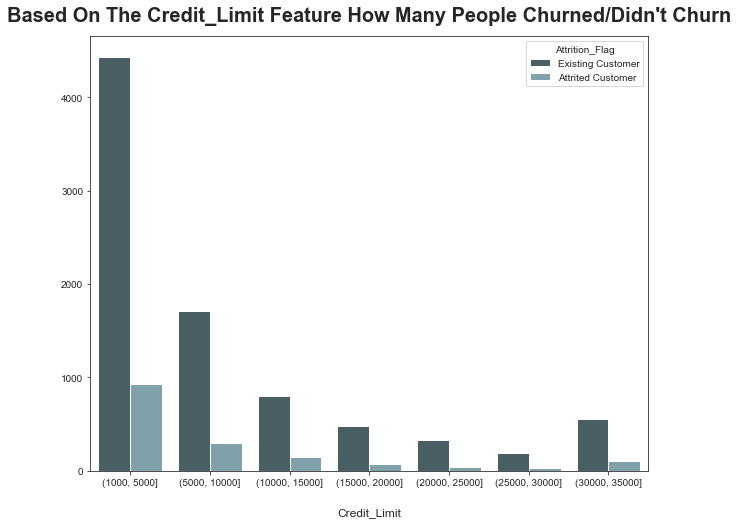

In [61]:
# plot
x = 'Credit_Limit'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the individuals in this dataset have a credit limit of 1,438.3 - 5,000 dollars

<br /> 

#### Total_Revolving_Bal

In [62]:
# seeing how many distinct values there are in this feature
len(df_vis['Total_Revolving_Bal'].unique())

1974

In [63]:
# what is the min value
df_vis['Total_Revolving_Bal'].min()

0

In [64]:
# what is the max value 
df_vis['Total_Revolving_Bal'].max()

2517

In [65]:
# create bins
# min - 0       max - 2,517
# plot the values: (0,500], (500,1000], (1000,1500], (1500,2000], (2000,2500], (2500,3000]

# define the bins 
revolving_bins = [0,500,1000,1500,2000,2500,3000]

# replace the values with the bins 
df_vis['Total_Revolving_Bal'] = pd.cut(df_vis['Total_Revolving_Bal'], bins = revolving_bins)

# making sure the bins looks the way I desired 
df_vis['Total_Revolving_Bal'].unique()

[(500.0, 1000.0], NaN, (2500.0, 3000.0], (1000.0, 1500.0], (2000.0, 2500.0], (1500.0, 2000.0], (0.0, 500.0]]
Categories (6, interval[int64]): [(0, 500] < (500, 1000] < (1000, 1500] < (1500, 2000] < (2000, 2500] < (2500, 3000]]

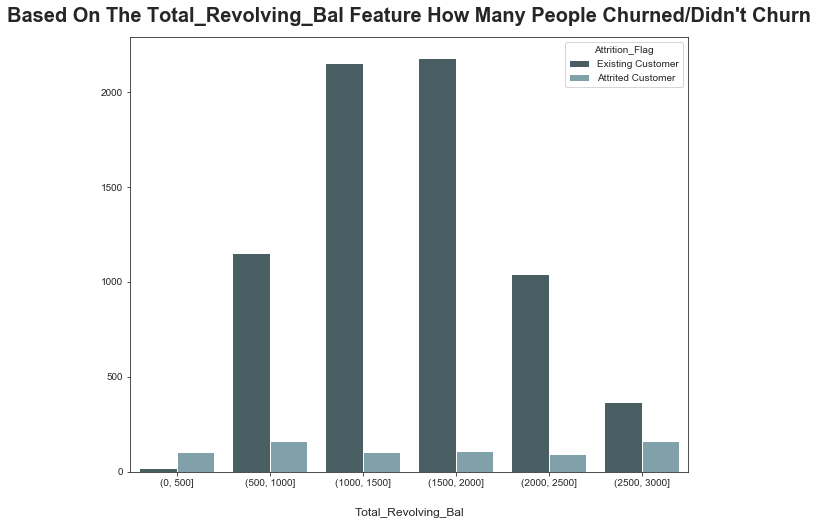

In [66]:
# plot 
x = 'Total_Revolving_Bal'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the revolving credit falls inbetween 1,000 - 2,000 dollars. Also people with a revolving credit of 0 till 500 were more likely to churn then not churn.

<br /> 

#### Avg_Open_To_Buy

In [67]:
# seeing how many distinct values there are in this feature
len(df_vis['Avg_Open_To_Buy'].unique())

6813

In [68]:
# what is the min value in this feature
df_vis['Avg_Open_To_Buy'].min()

3.0

In [69]:
# what is the max value in this feature
df_vis['Avg_Open_To_Buy'].max()

34516.0

In [70]:
# create bins 
# plot the values:(0,5000], (5000,10000], (10000,15000], (15000,20000], (20000,25000], (25000,30000], (30000,35000]

# defining the bins 
buy_bins = [0,5000,10000,15000,20000,25000,30000,35000]

# replacing the values with the bins 
df_vis['Avg_Open_To_Buy'] = pd.cut(df_vis['Avg_Open_To_Buy'], bins = buy_bins)

# seeing the values to make sure the bins look the way I desired
df_vis['Avg_Open_To_Buy'].unique()

[(10000, 15000], (5000, 10000], (0, 5000], (30000, 35000], (25000, 30000], (15000, 20000], (20000, 25000]]
Categories (7, interval[int64]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000] < (25000, 30000] < (30000, 35000]]

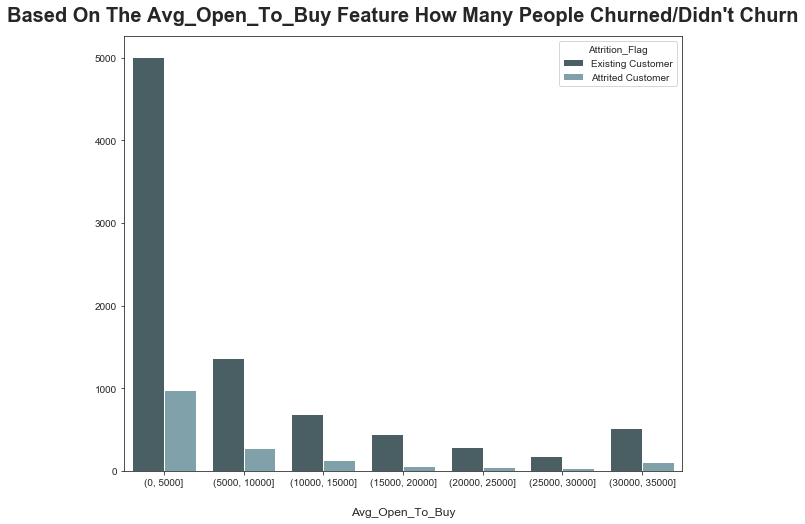

In [71]:
# plot
x = 'Avg_Open_To_Buy'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the people in the dataset fall in the range of 0 till 5,000 for the average open to buy feature.

<br /> 

#### Total_Amt_Chng_Q4_Q1

In [72]:
# seeing how many distinct values there are in this feature
len(df_vis['Total_Amt_Chng_Q4_Q1'].unique())

1158

In [73]:
# seeing the min value
df_vis['Total_Amt_Chng_Q4_Q1'].min()

0.0

In [74]:
# seeing the max value
df_vis['Total_Amt_Chng_Q4_Q1'].max()

3.397

In [75]:
# creating bins 
# plot the values: (0,0.5], (0.5,1], (1,1.5], (1.5,2], (2,2.5], (2.5,3], (3,3.5]

# defining the bins
total_amt_bins = [0,0.5, 1, 1.5, 2, 2.5, 3, 3.5]

# replacing the values with the bins 
df_vis['Total_Amt_Chng_Q4_Q1'] = pd.cut(df_vis['Total_Amt_Chng_Q4_Q1'], bins = total_amt_bins)

# seeing if the bins look the way I wanted 
df_vis['Total_Amt_Chng_Q4_Q1'].unique()

[(1.0, 1.5], (1.5, 2.0], (2.5, 3.0], (2.0, 2.5], (3.0, 3.5], (0.5, 1.0], (0.0, 0.5], NaN]
Categories (7, interval[float64]): [(0.0, 0.5] < (0.5, 1.0] < (1.0, 1.5] < (1.5, 2.0] < (2.0, 2.5] < (2.5, 3.0] < (3.0, 3.5]]

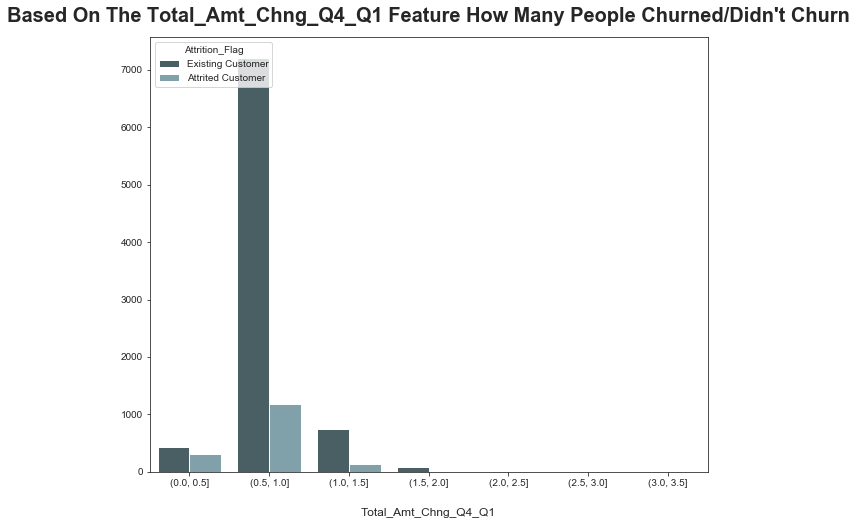

In [76]:
# plot 
x = 'Total_Amt_Chng_Q4_Q1'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the people fall in the range of 0.5 till 1.0. None of the other bins contain anythin close to that bin

<br /> 

#### Total_Trans_Amt

In [77]:
# seeing how many distinct values there are in this feature
len(df_vis['Total_Trans_Amt'].unique())

5033

In [78]:
# seeing the min value in this feature 
df_vis['Total_Trans_Amt'].min()

510

In [79]:
# seeing the max value in this feature 
df_vis['Total_Trans_Amt'].max()

18484

In [80]:
# create bins 
# plot the values: (0,2000], (2000,4000], (4000,6000], (6000,8000], (8000,10000], (10000,12000], (12000,14000], 
# (14000,16000], (16000,18000], (18000,20000]

# defining the bins 
total_trans_bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000]

# replacing the values in the feature with the bins
df_vis['Total_Trans_Amt'] = pd.cut(df_vis['Total_Trans_Amt'], bins = total_trans_bins)

# making sure the bins look the way I wanted
df_vis['Total_Trans_Amt'].unique()

[(0, 2000], (2000, 4000], (4000, 6000], (6000, 8000], (8000, 10000], (12000, 14000], (14000, 16000], (10000, 12000], (16000, 18000], (18000, 20000]]
Categories (10, interval[int64]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] ... (12000, 14000] < (14000, 16000] < (16000, 18000] < (18000, 20000]]

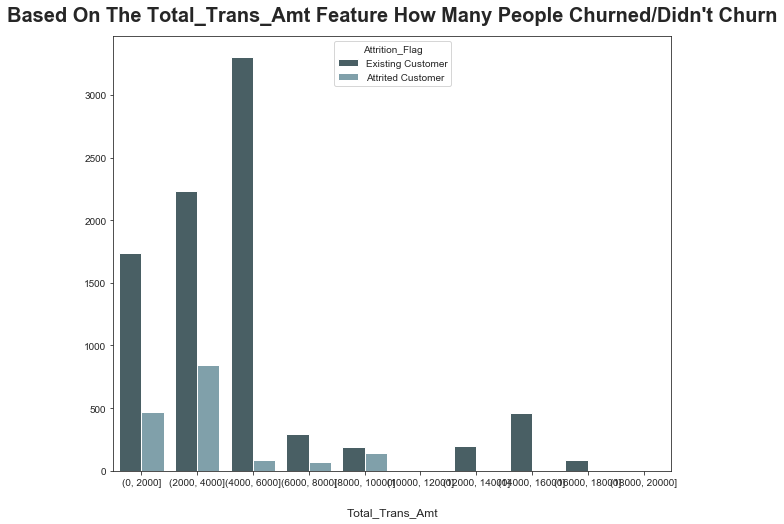

In [81]:
# plot 
x = 'Total_Trans_Amt'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the values fall in the range of 0 till 6000. The range were the most of the people churned were 2,000 till 4,000.

<br /> 

#### Total_Trans_Ct

In [82]:
# seeing how many distinct values this feature contains 
len(df_vis['Total_Trans_Ct'].unique())

126

In [83]:
# seeing the min value in the feature
df_vis['Total_Trans_Ct'].min()

10

In [84]:
# seeing the max value in the feature
df_vis['Total_Trans_Ct'].max()

139

In [85]:
# creating bins 
# plot the values: (0,10], (10,20], (20,30], (30,40], (40,50], (50,60], (60,70], (70,80], (80,90], (90,100], 
# (100,110], (110,120], (120,130], (130,140]

# defining the bins 
total_trans_ct_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

# replacing the values in the feature with the bins 
df_vis['Total_Trans_Ct'] = pd.cut(df_vis['Total_Trans_Ct'], bins = total_trans_ct_bins)

# seeing if the bins look the way I want them to look like 
df_vis['Total_Trans_Ct'].unique()

[(40, 50], (30, 40], (10, 20], (20, 30], (50, 60], ..., (90, 100], (100, 110], (110, 120], (120, 130], (130, 140]]
Length: 14
Categories (14, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (100, 110] < (110, 120] < (120, 130] < (130, 140]]

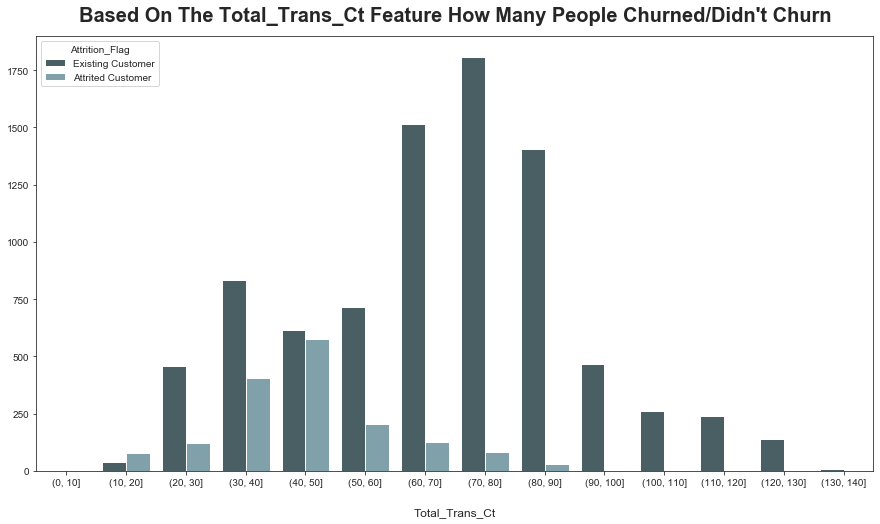

In [86]:
# plot 
x = 'Total_Trans_Ct'
figsize = (15,8)

create_plot(df_vis, x, figsize = figsize)

The chart looks somewhat similar to a bell curve. Most of the values fall in the range of 60 till 90. But the range that most of the churned individuals belong in is 30 till 50. 

<br /> 

#### Total_Ct_Chng_Q4_Q1

In [87]:
# seeing the number of distinct values in the feature 
len(df_vis['Total_Ct_Chng_Q4_Q1'].unique())

830

In [88]:
# seeing the min value
df_vis['Total_Ct_Chng_Q4_Q1'].min()

0.0

In [89]:
# seeing the max value
df_vis['Total_Ct_Chng_Q4_Q1'].max()

3.714

In [90]:
# creating bins 
# plot the values: (0,0.5], (0.5,1], (1,1.5], (1.5,2], (2,2.5], (2.5,3], (3,3.5], (3.5, 4.0]

# defining the bins 
total_ct_bins = [0,0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

# replacing the values with the bins 
df_vis['Total_Ct_Chng_Q4_Q1'] = pd.cut(df_vis['Total_Ct_Chng_Q4_Q1'], bins = total_ct_bins)

# making sure the bins look the way I desired
df_vis['Total_Ct_Chng_Q4_Q1'].unique()

[(1.5, 2.0], (3.5, 4.0], (2.0, 2.5], (0.5, 1.0], (1.0, 1.5], (3.0, 3.5], (0.0, 0.5], (2.5, 3.0], NaN]
Categories (8, interval[float64]): [(0.0, 0.5] < (0.5, 1.0] < (1.0, 1.5] < (1.5, 2.0] < (2.0, 2.5] < (2.5, 3.0] < (3.0, 3.5] < (3.5, 4.0]]

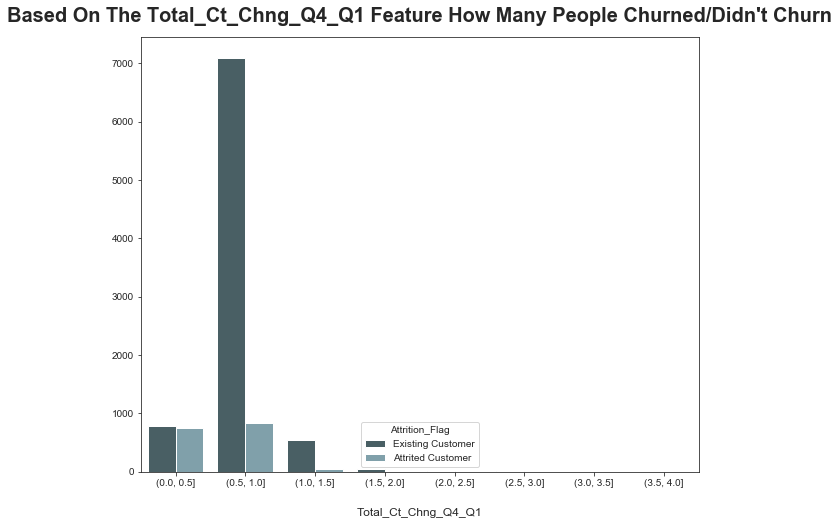

In [91]:
# plot 
x = 'Total_Ct_Chng_Q4_Q1'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the people in this chart fall in the range of 0.5 till 1.0. Also interestingly enough the number of people who churned for the ranges 0.0 till 0.5 and 0.5 till 1.0 are very close to one another. 

<br /> 

#### Avg_Utilization_Ratio

In [92]:
# seeing how many distinct values there are in this feature
len(df_vis['Avg_Utilization_Ratio'].unique())

964

In [93]:
# seiing the max values in the feature 
df_vis['Avg_Utilization_Ratio'].min()

0.0

In [94]:
# seeing the max values in the feature 
df_vis['Avg_Utilization_Ratio'].max()

0.9990000000000001

In [95]:
# creating bins 
# plot the values: (0,0.1], (0.1,0.2], (0.2,0.3], (0.3,0.4], (0.4,0.5], (0.5,0.6], (0.6,0.7], (0.7,0.8], (0.8,0.9], 
# (0.9,1]

# defining the bins 
avg_utilization_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# replacing the values with the bins 
df_vis['Avg_Utilization_Ratio'] = pd.cut(df_vis['Avg_Utilization_Ratio'], bins = avg_utilization_bins)

# making sure the bins look the way I desired
df_vis['Avg_Utilization_Ratio'].unique()

[(0.0, 0.1], (0.1, 0.2], NaN, (0.7, 0.8], (0.3, 0.4], ..., (0.6, 0.7], (0.5, 0.6], (0.8, 0.9], (0.4, 0.5], (0.9, 1.0]]
Length: 11
Categories (10, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

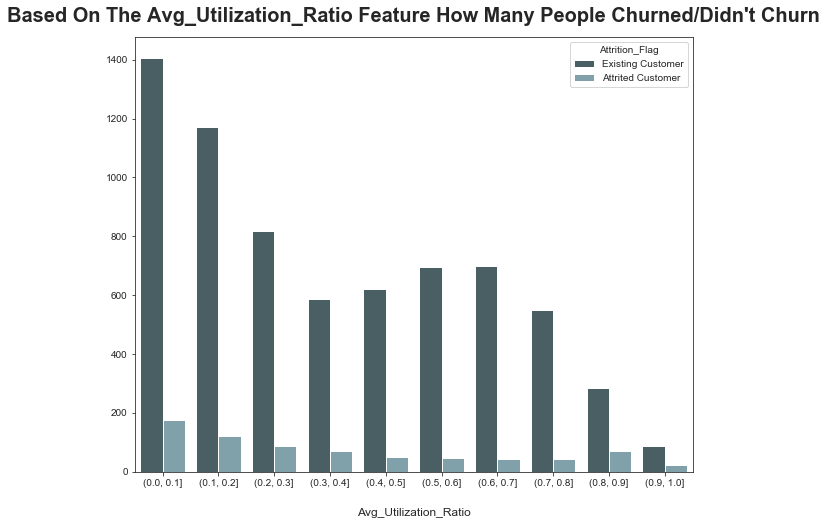

In [96]:
# plot 
x = 'Avg_Utilization_Ratio'
figsize = (10,8)

create_plot(df_vis, x, figsize = figsize)

Most of the poeple fall in the range of 0.0 till 0.2. Also as the range increased the number of people who churned decreases. 

<br /> 

## MACHINE LEARNING 

Since the dataset is imbalanced I am more focused on the f-score than the accuracy.

In [97]:
# importing required library
from sklearn.model_selection import StratifiedKFold

In [98]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [99]:
# convert attrition_flag to binary 
df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace = True)

df['Attrition_Flag'].unique()

array([0, 1])

<br />

### TRAINING AND TESTING SET

In [100]:
# a function that returns me the training and testing set
def get_train_test(x,y, splits = 5):
    skf = StratifiedKFold(n_splits = splits)
    
    for train_index, test_index in skf.split(x,y):
        x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    
    return (x_train, x_test, y_train, y_test)

<br /> 

### METRICS MEASURE 

In [101]:
# importing required libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [102]:
# get the sensitivity
def get_sensitivity(tp, fn):
    return (tp/(tp + fn))

In [103]:
# get the specificity 
def get_specificity(tn, fp):
    return (tn/(tn + fp))

In [104]:
# get the f score
def get_f_score(tp, fp, fn):
    precision = (tp/(tp + fp))
    recall = get_sensitivity(tp, fn)
    f_score = 2 * ((precision * recall)/ (precision + recall))
    return f_score

In [105]:
# use this function to get the accuraccy, sensitivty, specificity, and f-score of a model 
def get_metrics(y_test, y_pred):
    # getting the accuracy 
    accuracy = accuracy_score(y_test, y_pred)

    # getting the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)

    # storing the tp, fp, tn, fn values
    tp = matrix[1][1]
    fn = matrix[1][0]
    tn = matrix[0][0]
    fp = matrix[0][1]

    # passing tp, fp, tn, and fn into the metric functions created
    sensitivity = get_sensitivity(tp, fn)
    specificity = get_specificity(tn, fp)
    f_score = get_f_score(tp, fp, fn)

    # return the values
    return [accuracy, sensitivity, specificity, f_score]

<br /> 

### PIPELINE STAGE 1: ONE HOT ENCODING/SCALING

In [106]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [108]:
def get_one_hot_encoder(features):
    one_hot_encoder = make_column_transformer(
        (OneHotEncoder(), features),
        remainder = StandardScaler()
    )
    return one_hot_encoder

<br /> 

### PIPELINE STAGE 2: MODEL (WITHOUT HYPERPARAMETER TUNING/ FEATURE SELECTION)

In [109]:
# import required library 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [110]:
# getting training and testing set of all of the features 
(x_train, x_test, y_train, y_test) = get_train_test(df.drop(columns = ['Attrition_Flag']),
                                                    df['Attrition_Flag'], 
                                                    5
                                                   )

In [111]:
# getting the one_hot_encoder for the features that contain string values 
features = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
one_hot_encoder = get_one_hot_encoder(features)

In [112]:
# training the pipeline and using it to predict and returning the metrics measures
def get_model_info(one_hot_encoder, technique, x_train, x_test, y_train, y_test, print_values = 'yes'):
    # creating the pipeline
    pipe = make_pipeline(one_hot_encoder, technique)
    
    # creating the model with the pipeline
    model = pipe.fit(x_train, y_train)
    
    # predicting using the pipeline model 
    y_pred = model.predict(x_test)
    
    # obtain the metrics measures 
    results = get_metrics(y_test, y_pred)
    
    # print them out
    if print_values == 'yes':
        print('Accuracy: ' + str(results[0])+
              '\nsensitivity: ' + str(results[1]) + 
              '\nSpecificity: '+ str(results[2]) + 
              '\nF-Score: '+ str(results[3])
             )
    else:
        return results

<br /> 

#### Pipeline with Logistic Regression Estimator Accuracy, Sensitivity, Specificity, and F-Score

In [113]:
get_model_info(one_hot_encoder, LogisticRegression(max_iter = 500), x_train, x_test, y_train, y_test)

Accuracy: 0.8622222222222222
sensitivity: 0.16923076923076924
Specificity: 0.9947058823529412
F-Score: 0.2827763496143959


<br />

#### Pipeline with Decision Tree Estimator Accuracy, Sensitivity, Specificity, and F-Score

In [114]:
get_model_info(one_hot_encoder, DecisionTreeClassifier(), x_train, x_test, y_train, y_test)

Accuracy: 0.8538271604938271
sensitivity: 0.13846153846153847
Specificity: 0.9905882352941177
F-Score: 0.23316062176165803


<br /> 

#### Pipeline with Random Forest Estimator Accuracy, Sensitivity, Specificity, and F-Score

In [115]:
get_model_info(one_hot_encoder, RandomForestClassifier(), x_train, x_test, y_train, y_test)

Accuracy: 0.8483950617283951
sensitivity: 0.06461538461538462
Specificity: 0.9982352941176471
F-Score: 0.12034383954154727


<br /> 

### FEATURE SELECTION

Trying to increase f-score. The __highest f-score achieved thus far has been 28% with the pipeline using the Logistic Regression as its estimator__

<br /> 

#### Removing Card_Category

In [116]:
# removing the features from the features
x = df.drop(columns = ['Card_Category', 'Attrition_Flag'])
y = df['Attrition_Flag']

# getting the training and testing set 
(x_train, x_test, y_train, y_test) = get_train_test(x,y)

In [117]:
# adjusting the one_hot_encoder for the features since I am removing Card_Category from the features list
features = ['Education_Level', 'Marital_Status', 'Income_Category']
one_hot_encoder = get_one_hot_encoder(features)

In [118]:
print('Logisitic Regression:')
get_model_info(one_hot_encoder, LogisticRegression(max_iter = 500), x_train, x_test, y_train, y_test)

print()

print('Decision Tree')
get_model_info(one_hot_encoder, DecisionTreeClassifier(), x_train, x_test, y_train, y_test)

print()

print('Random Forest')
get_model_info(one_hot_encoder, RandomForestClassifier(), x_train, x_test, y_train, y_test)

Logisitic Regression:
Accuracy: 0.8612345679012345
sensitivity: 0.16307692307692306
Specificity: 0.9947058823529412
F-Score: 0.2739018087855297

Decision Tree
Accuracy: 0.8508641975308642
sensitivity: 0.11692307692307692
Specificity: 0.9911764705882353
F-Score: 0.20105820105820105

Random Forest
Accuracy: 0.845925925925926
sensitivity: 0.04923076923076923
Specificity: 0.9982352941176471
F-Score: 0.0930232558139535


<br /> 

#### Removing Customer_Age and Gender

In [119]:
# removing the features from the features
x = df.drop(columns = ['Customer_Age', 'Gender','Attrition_Flag'])

# getting the training and testing set 
(x_train, x_test, y_train, y_test) = get_train_test(x,y)

In [120]:
# adjusting the one_hot_encoder 
features = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
one_hot_encoder = get_one_hot_encoder(features)

In [121]:
print('Logisitic Regression:')
get_model_info(one_hot_encoder, LogisticRegression(max_iter = 500), x_train, x_test, y_train, y_test)

print()

print('Decision Tree')
get_model_info(one_hot_encoder, DecisionTreeClassifier(), x_train, x_test, y_train, y_test)

print()

print('Random Forest')
get_model_info(one_hot_encoder, RandomForestClassifier(), x_train, x_test, y_train, y_test)

Logisitic Regression:
Accuracy: 0.8661728395061729
sensitivity: 0.19076923076923077
Specificity: 0.9952941176470588
F-Score: 0.3139240506329114

Decision Tree
Accuracy: 0.854320987654321
sensitivity: 0.13846153846153847
Specificity: 0.9911764705882353
F-Score: 0.2337662337662338

Random Forest
Accuracy: 0.8479012345679012
sensitivity: 0.06153846153846154
Specificity: 0.9982352941176471
F-Score: 0.11494252873563218


<br /> 


#### Removing Gender, Education_Level, Dependent_count, Income_Category and Marital_Status

The reason I am not including Age is because there are alot of people of different ages so I want to incorpate that feature

In [122]:
# removing the features from the features
x = df.drop(columns = ['Dependent_count',
                       'Gender', 
                       'Education_Level',
                       'Marital_Status',
                       'Income_Category',
                       'Attrition_Flag']
           )

# getting the training and testing set 
(x_train, x_test, y_train, y_test) = get_train_test(x,y)

In [123]:
# adjusting the one_hot_encoder 
features = ['Card_Category']
one_hot_encoder = get_one_hot_encoder(features)

In [124]:
print('Logisitic Regression:')
get_model_info(one_hot_encoder, LogisticRegression(max_iter = 500), x_train, x_test, y_train, y_test)

print()

print('Decision Tree')
get_model_info(one_hot_encoder, DecisionTreeClassifier(), x_train, x_test, y_train, y_test)

print()

print('Random Forest')
get_model_info(one_hot_encoder, RandomForestClassifier(), x_train, x_test, y_train, y_test)

Logisitic Regression:
Accuracy: 0.8755555555555555
sensitivity: 0.25846153846153846
Specificity: 0.9935294117647059
F-Score: 0.4

Decision Tree
Accuracy: 0.8538271604938271
sensitivity: 0.13846153846153847
Specificity: 0.9905882352941177
F-Score: 0.23316062176165803

Random Forest
Accuracy: 0.8474074074074074
sensitivity: 0.05846153846153846
Specificity: 0.9982352941176471
F-Score: 0.1095100864553314


In [125]:
# removing Gender, Education_Level, Dependent_count, Income_Category and Marital_Status
df.drop(columns = ['Dependent_count','Gender', 'Education_Level', 'Marital_Status', 'Income_Category'], 
        inplace = True)

# viewing the remaining columns
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<br /> 

### HYPERPARAMETER TUNING

<br /> 

#### Finding The Best C value

In [126]:
# getting the training and testing set
x = df.drop(columns = ['Attrition_Flag'])
y = df['Attrition_Flag']

(x_train, x_test, y_train, y_test) = get_train_test(x, y)

In [127]:
# increasing the C parameter to see if the sensitivity increases
c_list = [*(range(1,10,1)), *(range(10,101,10))]
Accuracy = []
Sensitivity = []
Specificity = []
F_score = []
log_hyper_results = pd.DataFrame()

for c in c_list:
    results = get_model_info(one_hot_encoder, 
                             LogisticRegression(max_iter = 500, C = c), 
                             x_train, x_test, y_train, y_test,
                             print_values = 'no'
                            )
    Accuracy.append(results[0])
    Sensitivity.append(results[1])
    Specificity.append(results[2])
    F_score.append(results[3])


    
# place the values inside of the DataFrame 
log_hyper_results['C_list'] = c_list
log_hyper_results['Accuracy'] = Accuracy
log_hyper_results['Sensitivity'] = Sensitivity
log_hyper_results['Specificity'] = Specificity
log_hyper_results['F_score'] = F_score

In [128]:
# seeing what the dataframe looks like
log_hyper_results.head()

,C_list,Accuracy,Sensitivity,Specificity,F_score
0,1,0.875556,0.258462,0.993529,0.400000
1,2,0.876049,0.264615,0.992941,0.406619
2,3,0.876049,0.264615,0.992941,0.406619
3,4,0.877037,0.270769,0.992941,0.414118
4,5,0.876543,0.270769,0.992353,0.413146


In [129]:
# seeing the 10 largest F_scores to see which one is the best
log_hyper_results.nlargest(10, 'F_score')

,C_list,Accuracy,Sensitivity,Specificity,F_score
12,40,0.876543,0.273846,0.991765,0.415888
13,50,0.876543,0.273846,0.991765,0.415888
14,60,0.876543,0.273846,0.991765,0.415888
15,70,0.876543,0.273846,0.991765,0.415888
16,80,0.876543,0.273846,0.991765,0.415888
17,90,0.876543,0.273846,0.991765,0.415888
18,100,0.876543,0.273846,0.991765,0.415888
3,4,0.877037,0.270769,0.992941,0.414118
4,5,0.876543,0.270769,0.992353,0.413146
5,6,0.876543,0.270769,0.992353,0.413146


<br /> 

### BAGGING

In [130]:
# importing required library
from sklearn.ensemble import BaggingClassifier

In [131]:
# trying out 5 estimators of Logistic regression 
get_model_info(one_hot_encoder, 
               BaggingClassifier(base_estimator = LogisticRegression(max_iter = 500, C = 40), 
                                                 n_estimators = 5
                                                 ),
               x_train, 
               x_test, 
               y_train,
               y_test
              )

Accuracy: 0.8750617283950617
sensitivity: 0.27692307692307694
Specificity: 0.9894117647058823
F-Score: 0.41570438799076215


In [135]:
# trying to figure out what is the best number of estimators to use
n_list = []
Accuracy = []
Sensitivity = []
Specificity = []
F_score = []
c_list = []
bagging_results = pd.DataFrame()

# since the F-score and sensitivity of 40, 50, 60, 70, 80, 90, 100 are the same trying to see if using bagging will 
# give me different results for the C values or the same 
for c in range(40, 101, 10):
    for n in range(2,21,1):
        temp_Accuracy = []
        temp_Sensitivity = []
        temp_Specificity = []
        temp_F_score = []
        
        # run it 10 times
        for i in range(1,11, 1): 
            results = get_model_info(one_hot_encoder, 
                       BaggingClassifier(base_estimator = LogisticRegression(max_iter = 500, C = c), 
                                                         n_estimators = n
                                                         ),
                                     x_train, 
                                     x_test, 
                                     y_train,
                                     y_test,
                                     print_values = 'no'
                      )
            # store the measures
            temp_Accuracy.append(results[0])
            temp_Sensitivity.append(results[1])
            temp_Specificity.append(results[2])
            temp_F_score.append(results[3])
        
        # store the mean of the measures 
        n_list.append(n)
        c_list.append(c)
        Accuracy.append(sum(temp_Accuracy)/len(temp_Accuracy))
        Sensitivity.append(sum(temp_Sensitivity)/len(temp_Sensitivity))
        Specificity.append(sum(temp_Specificity)/len(temp_Specificity))
        F_score.append(sum(temp_F_score)/len(temp_F_score))


    
# place the values inside of the DataFrame 
bagging_results['C'] = c_list
bagging_results['n_list'] = n_list
bagging_results['Accuracy'] = Accuracy
bagging_results['Sensitivity'] = Sensitivity
bagging_results['Specificity'] = Specificity
bagging_results['F_score'] = F_score

In [136]:
bagging_results.head()

,C,n_list,Accuracy,Sensitivity,Specificity,F_score
0,40,2,0.875704,0.276308,0.990294,0.416000
1,40,3,0.875506,0.260615,0.993059,0.401413
2,40,4,0.875309,0.264615,0.992059,0.404647
3,40,5,0.876148,0.277231,0.990647,0.417638
4,40,6,0.874815,0.256000,0.993118,0.395444


In [137]:
bagging_results.nlargest(5, 'F_score')

,C,n_list,Accuracy,Sensitivity,Specificity,F_score
114,100,2,0.877185,0.298769,0.987765,0.437109
79,80,5,0.876543,0.279385,0.990706,0.420460
20,50,3,0.876938,0.277846,0.991471,0.419363
58,70,3,0.876148,0.279385,0.990235,0.418962
69,70,14,0.876395,0.277846,0.990824,0.418862


<br /> 

## CONCLUSION 

__The best estimator to use inside of the pipeline__: BaggingClassifier with the base estimator set to Logistic Regression and using C = 100, max_iter = 500 and setting the n_estimators for the baggingClassifier to be 2.   